In [1]:
from evomol.molgraphops.molgraph import MolGraph, MolGraphBuilder

In [2]:
from rdkit import Chem

# testing purposes
aspirin_smiles = "CC(=O)Oc1ccccc1C(=O)O"
aspirin = Chem.MolFromSmiles(aspirin_smiles)

In [3]:
from rdkit.Chem import Draw

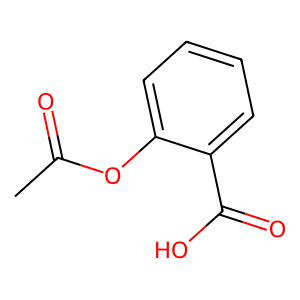

In [4]:
# reference
Draw.MolToImage(aspirin)

In [5]:
from evomol.ga import Population, run_ga, PopMember, Logger
from evomol.ga.population import compare_generated_to_reference, pop_minus

In [6]:
test_pop = Population([PopMember(aspirin_smiles)]).repeat(10)

### Test simple substitution action space

In [7]:
from evomol.ga.defined_action_spaces import SubstitutionMovingOnlyActionSpace

SYMBOLS LIST : ['Cl', 'F', 'O', 'Br', 'N']
SYMBOLS LIST : ['Cl', 'F', 'O', 'Br', 'N']


In [8]:
logger = Logger()
run_ga(test_pop, SubstitutionMovingOnlyActionSpace, 30, logger)

Substitute atom of id 11 and type O by N
Substitute atom of id 12 and type O by F
Substitute atom of id 12 and type O by Br
Substitute atom of id 12 and type Br by F
Substitute atom of id 12 and type O by Br
Substitute atom of id 2 and type O by N
Substitute atom of id 3 and type O by N
Substitute atom of id 12 and type O by F
Substitute atom of id 2 and type O by N
Substitute atom of id 3 and type O by N
Substitute atom of id 12 and type O by F
Substitute atom of id 12 and type F by N
Substitute atom of id 12 and type O by F
Substitute atom of id 12 and type F by N
Substitute atom of id 12 and type N by F
Substitute atom of id 12 and type O by F
Substitute atom of id 12 and type O by Br
Substitute atom of id 11 and type O by N
Substitute atom of id 3 and type O by N
Substitute atom of id 11 and type O by N
Substitute atom of id 12 and type O by F
Substitute atom of id 12 and type O by N
Substitute atom of id 12 and type N by Br
Substitute atom of id 3 and type O by Br
Substitute atom 

Population after three steps

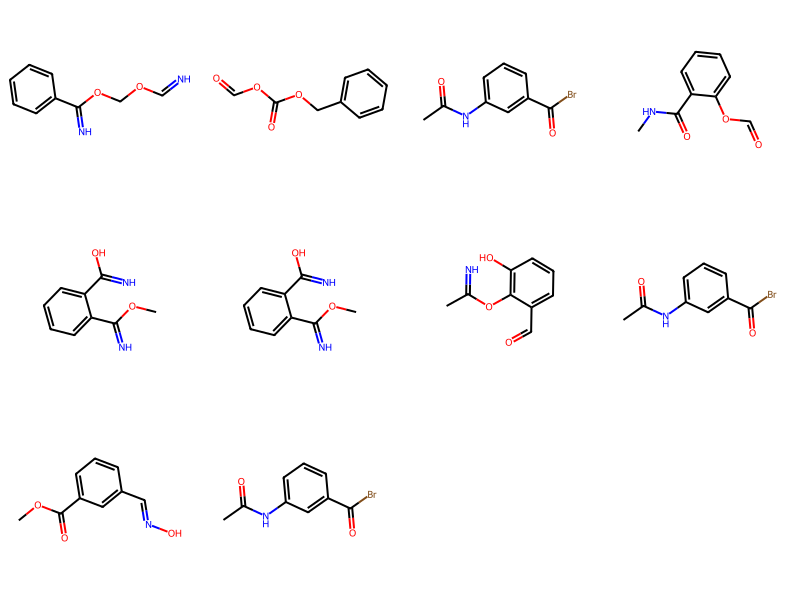

In [9]:
pop = logger.populations[3]
novel = pop_minus(pop, test_pop)
mols = [member.rdkit_mol for member in novel.members]
Draw.MolsToGridImage(mols, molsPerRow=4)

Population after one step

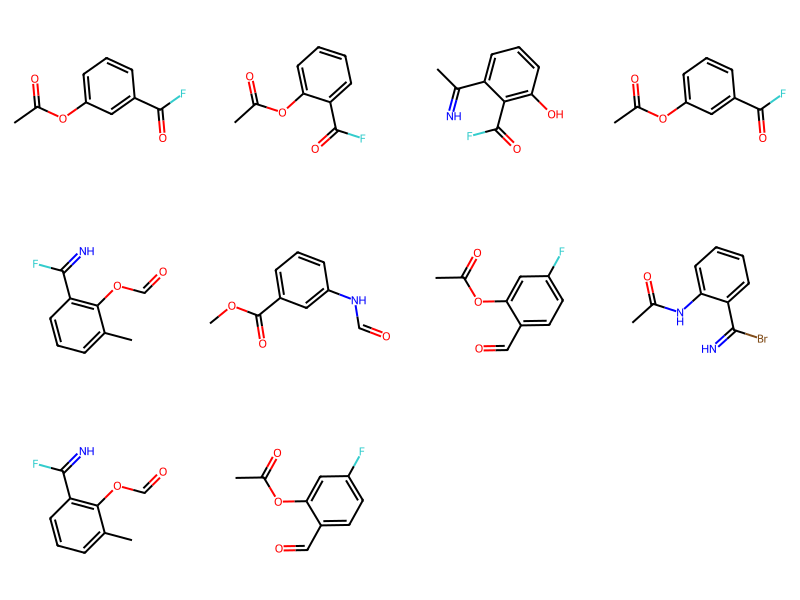

In [10]:
pop = logger.populations[1]
novel = pop_minus(pop, test_pop)
mols = [member.rdkit_mol for member in novel.members]
Draw.MolsToGridImage(mols, molsPerRow=4)

After many steps

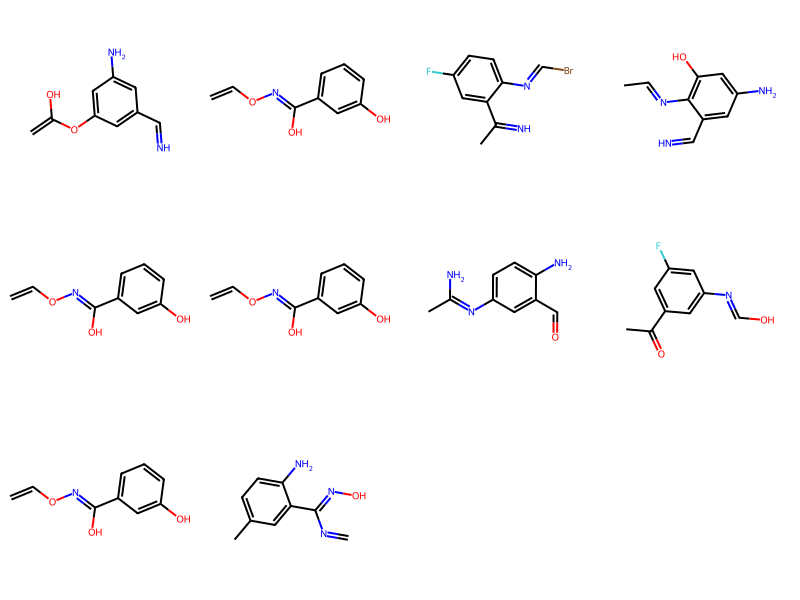

In [11]:
pop = logger.populations[-1]
novel = pop_minus(pop, test_pop)
mols = [member.rdkit_mol for member in novel.members]
Draw.MolsToGridImage(mols, molsPerRow=4)

### Load ambigols

In [12]:
import pandas as pd

In [13]:
ambigol_data = pd.read_csv("ambigols.csv")
ambigol_data.head()

,Smiles,is_susceptible,mic
0,OC1=C(OC2=CC=C(Cl)C=C2Cl)C(Cl)=CC(Cl)=C1C3=C(O...,True,0.570000
1,OC1=C(OC2=CC=C(Cl)C=C2Cl)C(Cl)=CC(Cl)=C1OC3=C(...,True,0.160000
2,ClC1=C(O)C(Cl)=C(OC2=C(Cl)C=C(Cl)C=C2)C=C1OC3=...,True,1.956667
3,ClC1=CC(Cl)=C(O)C(C2=C(Cl)C(OC3=C(Cl)C=C(Cl)C=...,True,0.653333
4,ClC1=CC(Cl)=C(O)C(C2=C(OC3=C(Cl)C=C(Cl)C=C3)C(...,True,0.653333


In [14]:
ambigol_mols = [Chem.MolFromSmiles(smiles) for smiles in ambigol_data["Smiles"]]

In [15]:
test_pop = Population([PopMember(smiles) for smiles in ambigol_data["Smiles"]])

In [16]:
logger = Logger()
run_ga(test_pop, SubstitutionMovingOnlyActionSpace, 30, logger)

Substitute atom of id 13 and type Cl by Br
Substitute atom of id 11 and type Cl by O
Substitute atom of id 13 and type Cl by N
Substitute atom of id 16 and type O by Br
Substitute atom of id 3 and type O by Br
Substitute atom of id 13 and type Cl by N
Substitute atom of id 11 and type Cl by F
Substitute atom of id 8 and type Cl by Br
Substitute atom of id 14 and type Cl by F
Substitute atom of id 10 and type Cl by Br
Substitute atom of id 17 and type Cl by O
Substitute atom of id 7 and type Cl by F
Substitute atom of id 0 and type O by N
Substitute atom of id 11 and type Cl by F
Substitute atom of id 0 and type O by N
Substitute atom of id 14 and type Cl by N
Substitute atom of id 7 and type Cl by N
Substitute atom of id 7 and type N by F
Substitute atom of id 0 and type Cl by F
Substitute atom of id 7 and type Cl by Br
Substitute atom of id 10 and type Cl by N
Substitute atom of id 0 and type Cl by N
Substitute atom of id 11 and type Cl by Br
Substitute atom of id 11 and type Cl by Br

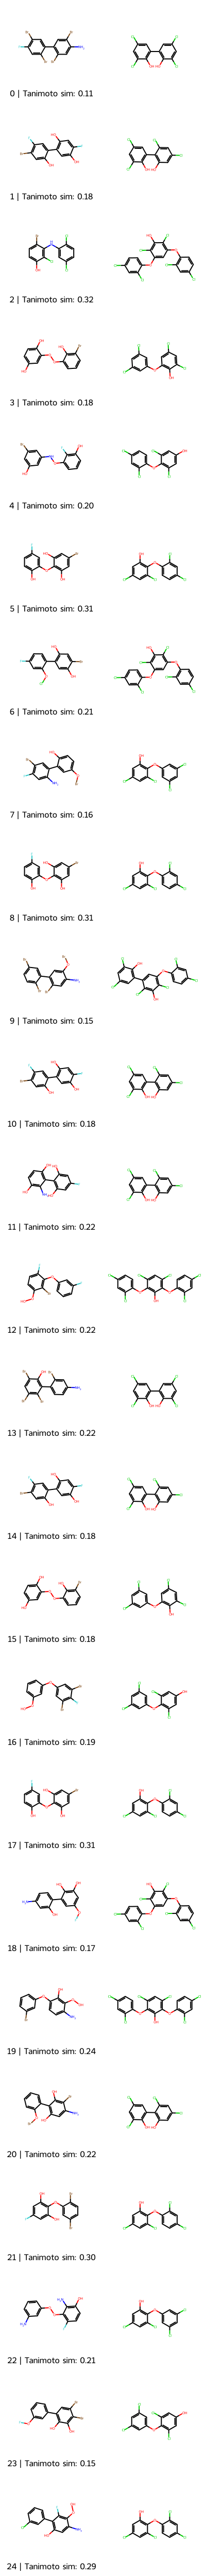

In [17]:
pop = logger.populations[4]
compare, _, sims = compare_generated_to_reference(pop, ambigol_mols)
img = Draw.MolsToGridImage(compare, molsPerRow=2, legends=sims, returnPNG=True)
img

### With complex actions that change the core

In [18]:
from evomol.ga.defined_action_spaces import ComplexActionSpace

In [19]:
logger = Logger()
run_ga(test_pop, ComplexActionSpace, 30, logger)

Substitute atom of id 5 and type Cl by F
Substitute atom of id 3 and type O by N
Substitute atom of id 6 and type O by N
Substitute atom of id 3 and type Cl by N
Substitute atom of id 9 and type Cl by O
Substitute atom of id 9 and type Cl by Br
Substitute atom of id 9 and type O by N
Substitute atom of id 4 and type Cl by Br
Substitute atom of id 18 and type O by N
Substitute atom of id 9 and type Cl by Br
Substitute atom of id 14 and type Cl by O
Substitute atom of id 4 and type Cl by O
Substitute atom of id 4 and type Cl by F
Substitute atom of id 11 and type Cl by N
Substitute atom of id 0 and type Cl by F
Substitute atom of id 14 and type Cl by Br
Substitute atom of id 1 and type O by N
Substitute atom of id 14 and type Cl by O
Substitute atom of id 18 and type Cl by Br
Substitute atom of id 9 and type Cl by F
Substitute atom of id 17 and type Cl by N
Substitute atom of id 14 and type Cl by N
Substitute atom of id 3 and type Cl by Br
Substitute atom of id 3 and type O by F
Substitu

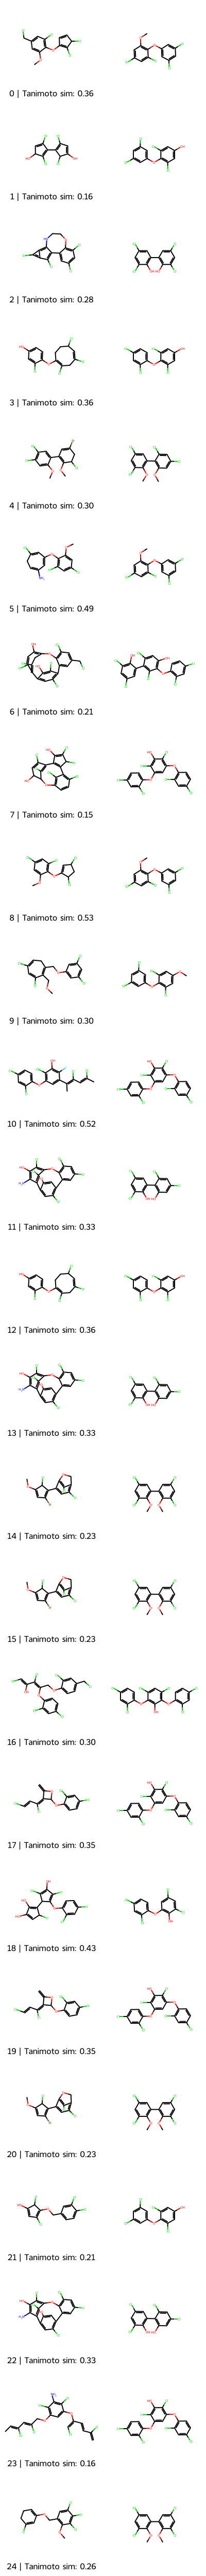

In [20]:
pop = logger.populations[1]
compare, _, sims = compare_generated_to_reference(pop, ambigol_mols)
img = Draw.MolsToGridImage(compare, molsPerRow=2, legends=sims, returnPNG=True)
img